In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# for showing all columns
pd.set_option('display.max_columns', None)

In [2]:
# reading dataset
df = pd.read_csv('./data/data.csv')

print('shape of dataset', df.shape)

shape of dataset (233154, 41)


In [3]:
df.head(10)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-1990,Self employed,19-09-2018,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-1988,Salaried,23-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-1989,Salaried,16-09-2018,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-1991,Self employed,05-09-2018,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-1968,Salaried,16-09-2018,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [5]:
df.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


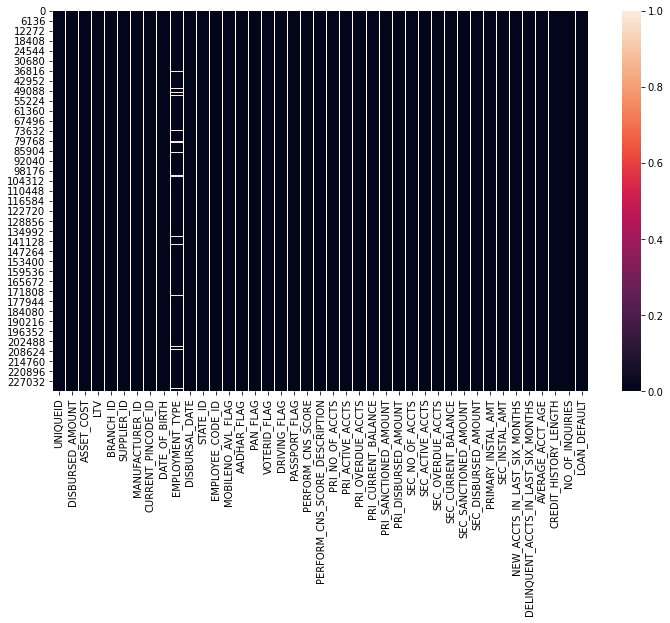

In [6]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

In [7]:
# function for removing those columns having null values graeter than 50%
def null_values(df):
    
    missing_values = 0
    columns_array = np.empty(0)
    
    for i in df.columns:
        if (np.dtype(df[i]) ==  'int64' or np.dtype(df[i]) ==  'float64') == True: # taking integer or float columns
            if df[i].max() > 1: # taking columns without binary values
                
                missing_values = np.floor((df[df[i] == 0].shape[0] / len(df[i])) * 100)
                print('Column name: {}, missing values: {}%' .format(i, missing_values))
                
                if missing_values >= 50: # appending columns with greater than 50% missing values
                    columns_array = np.append(columns_array, i)    
                    
    return columns_array

In [8]:
drop_columns = null_values(df)

Column name: UNIQUEID, missing values: 0.0%
Column name: DISBURSED_AMOUNT, missing values: 0.0%
Column name: ASSET_COST, missing values: 0.0%
Column name: LTV, missing values: 0.0%
Column name: BRANCH_ID, missing values: 0.0%
Column name: SUPPLIER_ID, missing values: 0.0%
Column name: MANUFACTURER_ID, missing values: 0.0%
Column name: CURRENT_PINCODE_ID, missing values: 0.0%
Column name: STATE_ID, missing values: 0.0%
Column name: EMPLOYEE_CODE_ID, missing values: 0.0%
Column name: PERFORM_CNS_SCORE, missing values: 50.0%
Column name: PRI_NO_OF_ACCTS, missing values: 50.0%
Column name: PRI_ACTIVE_ACCTS, missing values: 58.0%
Column name: PRI_OVERDUE_ACCTS, missing values: 88.0%
Column name: PRI_CURRENT_BALANCE, missing values: 60.0%
Column name: PRI_SANCTIONED_AMOUNT, missing values: 59.0%
Column name: PRI_DISBURSED_AMOUNT, missing values: 59.0%
Column name: SEC_NO_OF_ACCTS, missing values: 97.0%
Column name: SEC_ACTIVE_ACCTS, missing values: 98.0%
Column name: SEC_OVERDUE_ACCTS, missi

In [9]:
# droping columns having null values greater than 50%
df_clean = df.drop(drop_columns, axis=1)
print('Shape of cleaned dataset: {}' .format(df_clean.shape))

Shape of cleaned dataset: (233154, 23)


In [10]:
# extracating age (year) from the column DATE_OF_BIRTH
df_clean['AGE'] = [2021-int(df_clean['DATE_OF_BIRTH'][i][-4:]) for i in range(len(df_clean['DATE_OF_BIRTH']))]
df_clean = df_clean.drop(['DATE_OF_BIRTH'], axis=1)


In [11]:
def set_dummies(column):
    
    dummies_array = np.empty(0)
    for i in column:
        dummies = 0
        dummies = re.findall('\d+', i)
        dummies = float(dummies[0] + '.' + dummies[1]) # year.months
        dummies_array = np.append(dummies_array, dummies)
        
    return dummies_array

In [12]:
df_clean['AVERAGE_ACCT_AGE'] = set_dummies(df_clean['AVERAGE_ACCT_AGE'])
df_clean['CREDIT_HISTORY_LENGTH'] = set_dummies(df_clean['CREDIT_HISTORY_LENGTH'])

In [13]:
# checking null values in EMPLOYMENT_TYPE
print(df_clean['EMPLOYMENT_TYPE'].unique())
(df_clean['EMPLOYMENT_TYPE'].isnull()).value_counts()

['Salaried' 'Self employed' nan]


False    225493
True       7661
Name: EMPLOYMENT_TYPE, dtype: int64

In [14]:
# adding dummy values in columns EMPLOYMENT_TYPE and PERFORM_CNS_SCORE_DESCRIPTION
dic = {'Self employed' : 0, 'Salaried' : 1, np.nan : 3}
df_clean['EMPLOYMENT_TYPE'] = df_clean['EMPLOYMENT_TYPE'].map(dic)

dic1 = {'No Bureau History Available':0, 'I-Medium Risk':1, 'L-Very High Risk':2, 'A-Very Low Risk':3,
        'Not Scored: Not Enough Info available on the customer':4, 'D-Very Low Risk':5, 'M-Very High Risk':6, 
        'B-Very Low Risk':7, 'C-Very Low Risk':8, 'E-Low Risk':9, 'H-Medium Risk':10, 'F-Low Risk':11,
        'K-High Risk':12, 'Not Scored: No Activity seen on the customer (Inactive)':13,
        'Not Scored: Sufficient History Not Available':14, 'Not Scored: No Updates available in last 36 months':15, 
        'G-Low Risk':16, 'J-High Risk':17, 'Not Scored: Only a Guarantor':18,
        'Not Scored: More than 50 active Accounts found':19}

df_clean['PERFORM_CNS_SCORE_DESCRIPTION'] = df_clean['PERFORM_CNS_SCORE_DESCRIPTION'].map(dic1)

In [15]:
df_clean.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE_DESCRIPTION,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,LOAN_DEFAULT,AGE
0,420825,50578,58400,89.55,67,22807,45,1441,1,03-08-2018,6,1998,1,1,0,0,0,0,0,0.00,0.00,0,37
1,537409,47145,65550,73.23,67,22807,45,1502,0,26-09-2018,6,1998,1,1,0,0,0,0,1,1.11,1.11,1,36
2,417566,53278,61360,89.63,67,22807,45,1497,0,01-08-2018,6,1998,1,1,0,0,0,0,0,0.00,0.00,0,36
3,624493,57513,66113,88.48,67,22807,45,1501,0,26-10-2018,6,1998,1,1,0,0,0,0,2,0.80,1.30,1,28
4,539055,52378,60300,88.39,67,22807,45,1495,0,26-09-2018,6,1998,1,1,0,0,0,0,0,0.00,0.00,1,44


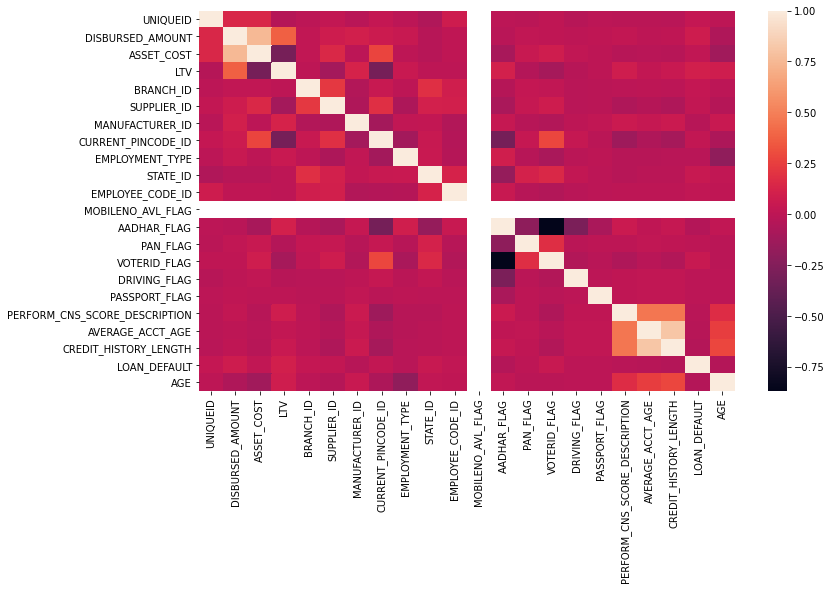

In [16]:
# plotting computed correlation among the columns
plt.figure(figsize=(12,7))
sns.heatmap(df_clean.corr())

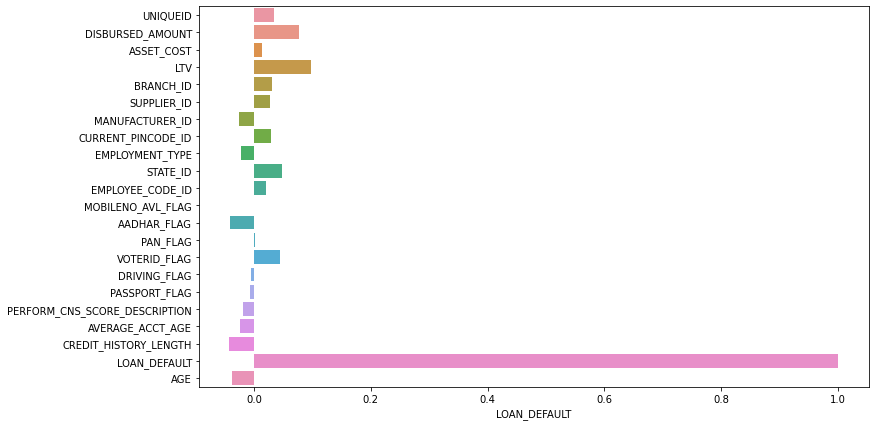

In [17]:
plt.figure(figsize=(12,7))
# checking correlation between all columns with LOAN_DEFAULT
sns.barplot(df_clean.corr()['LOAN_DEFAULT'], df_clean.corr().columns)

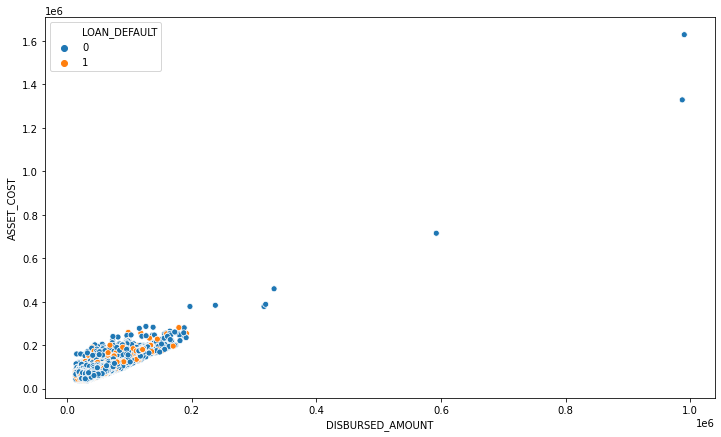

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(df_clean['DISBURSED_AMOUNT'], df_clean['ASSET_COST'], hue=df_clean['LOAN_DEFAULT'])

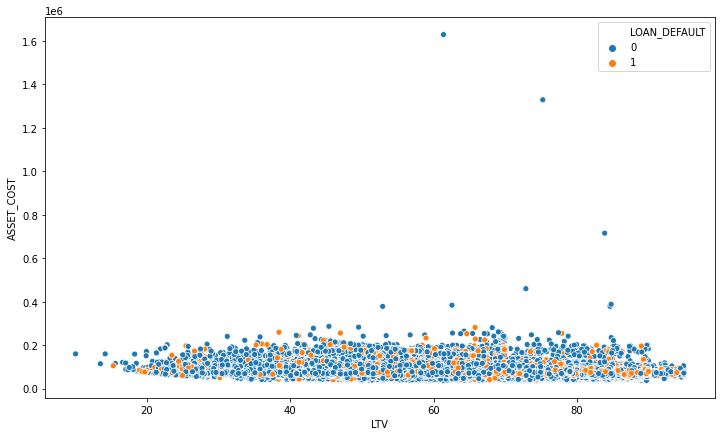

In [19]:
plt.figure(figsize=(12,7))
sns.scatterplot(df_clean['LTV'], df_clean['ASSET_COST'], hue=df_clean['LOAN_DEFAULT'])

# Tasks

1) We can observe from the heatmap that there is no relationship between the independent variables and dependent variable.

2) There is no clue that whether the demography or financial data provide correlation with LOAN_DEFAULT column.

3) As the independent variables and dependent variable are not correlated therefore, I could not conclude that which independent variable will lead to better results. Furthermore, there are few columns which are correlated with each other and that may skew the model. Therefore, we can use Principal Component Analysis in order to remove the correlation among the independent variables.

4) Regarding the suggestion of estimator, we can use Random Forest (RF) or Support Vector Machine (SVM).

# Observations

From the heatmap having correlation among columns, we can observe that there is no significant relationship between independent variables and dependent (target) variable. Furthermore, AADHAR_FLAG and VOTERID_FLAG, and DISBURSED_AMOUNT and ASSET_COST columns have very high correlation. 

There are outliers in the dataset as we can analyze from scatter plot. Furthermore, the target variable has greater number of 0 than 1 which leads to class imbalance problem. 

If you have any query then feel free to contact. Thanks!